# Part 1 DATA IFORMATION

In [1]:
import shutil
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import numpy as np

In [2]:
csv_file = "BostonHousing.csv"
df = pd.read_csv(csv_file)
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

crim: Per capita crime rate by town.


zn: Proportion of large residential lots (over 25,000 sq. ft.).


indus: Proportion of non-retail business acres per town.



Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).



nox: Concentration of nitrogen oxides in the air.



rm: Average number of rooms per dwelling.



age: Proportion of old owner-occupied units built before 1940.


dis: Weighted distances to Boston employment centers.


rad: Index of accessibility to radial highways.



tax: Property tax rate per $10,000.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
csv_file2 = "crime.csv"
df2 = pd.read_csv(csv_file2,encoding='latin-1')
df2.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     Tuesday     0    Part Two     HECLA ST  42.306821 -71.060300   
2      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4      Monday    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294464 entries, 0 to 294463
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      294464 non-null  object 
 1   OFFENSE_CODE         294464 non-null  int64  
 2   OFFENSE_CODE_GROUP   294464 non-null  object 
 3   OFFENSE_DESCRIPTION  294464 non-null  object 
 4   DISTRICT             292786 non-null  object 
 5   REPORTING_AREA       294464 non-null  object 
 6   SHOOTING             921 non-null     object 
 7   OCCURRED_ON_DATE     294464 non-null  object 
 8   YEAR                 294464 non-null  int64  
 9   MONTH                294464 non-null  int64  
 10  DAY_OF_WEEK          294464 non-null  object 
 11  HOUR                 294464 non-null  int64  
 12  UCR_PART             294377 non-null  object 
 13  STREET               284088 non-null  object 
 14  Lat                  275361 non-null  float64
 15  Long             

Mising Value

In [6]:
missing_values_count1 = df.isnull().sum()
missing_values_count1

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
missing_values_count2 = df2.isnull().sum()
missing_values_count2

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1678
REPORTING_AREA              0
SHOOTING               293543
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   87
STREET                  10376
Lat                     19103
Long                    19104
Location                    1
dtype: int64

percent_missing of BostonHousing.csv: 0.070582% 


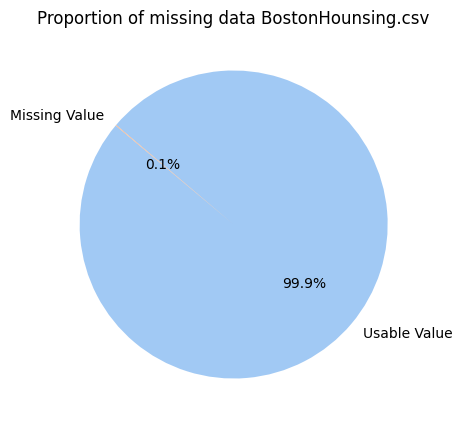

In [8]:
total_cells1 = np.prod(df.shape)
total_missing1 = missing_values_count1.sum()
percent_missing = (total_missing1/total_cells1) * 100
print("percent_missing of BostonHousing.csv: {:.6f}% ".format(percent_missing))

plt.figure(figsize=(16,5))
plt.pie([total_cells1 - total_missing1, total_missing1],
    labels=['Usable Value', 'Missing Value'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title("Proportion of missing data BostonHounsing.csv")
plt.show()

percent_missing of BostonHousing.csv: 6.87 %


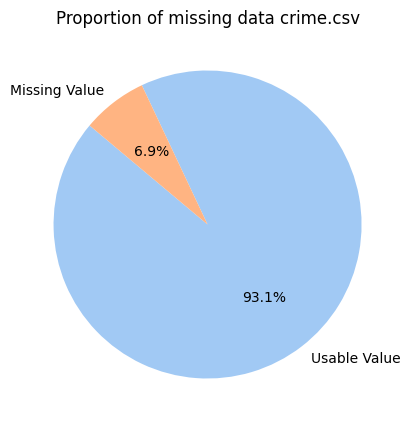

In [9]:
total_cells2 = np.prod(df2.shape)
total_missing2 = missing_values_count2.sum()
percent_missing2 = (total_missing2/total_cells2) * 100
print("percent_missing of BostonHousing.csv: {:.2f} %".format(percent_missing2))

plt.figure(figsize=(16,5))
plt.pie([total_cells2 - total_missing2, total_missing2],
    labels=['Usable Value', 'Missing Value'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title("Proportion of missing data crime.csv")
plt.show()

# Part 2  Data Analysis

In [10]:
mean_of_crime = np.mean(df['crim'])
print("The average crime rate of each city is {:.2f}".format(mean_of_crime))

The average crime rate of each city is 3.61


In [11]:
min_of_crime = np.min(df['crim'])
print("The minimum crime rate of each city is {:.2f}".format(min_of_crime))
df[df['crim'] == min_of_crime]

The minimum crime rate of each city is 0.01


crim    zn  indus  chas    nox     rm   age   dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296     15.3   

       b  lstat  medv  
0  396.9   4.98  24.0

In [12]:
max_of_crime = np.max(df['crim'])
print("The maximum crime rate of each city is {:.2f}".format(max_of_crime))
df[df['crim'] == max_of_crime]

The maximum crime rate of each city is 88.98


crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
380  88.9762  0.0   18.1     0  0.671  6.968  91.9  1.4165   24  666     20.2   

         b  lstat  medv  
380  396.9  17.21  10.4

 The 10 Most Crime-Happening Streets in Boston

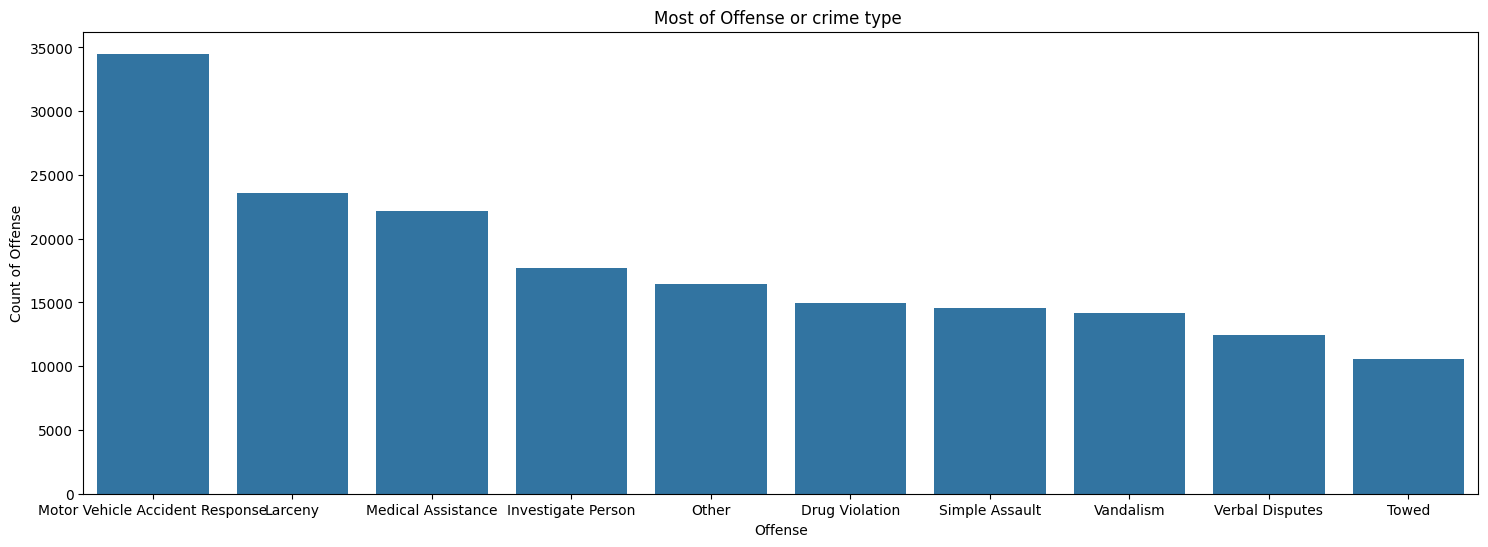

In [13]:
offense_codes_group_sorted = df2["OFFENSE_CODE_GROUP"].value_counts()
plt.figure(figsize=(18,6))
plt.title("Most of Offense or crime type ")
sns.barplot(offense_codes_group_sorted[:10,])
plt.ylabel("Count of Offense")
plt.xlabel("Offense")
plt.show()



> Displaying the frequency of crime types in Boston, divided into three categories as follows:
>
> **1. UCR Part I**
> Meaning: Comprises highly violent crimes considered major offenses that impact public safety.
> Types of crimes:
>
> * Murder
> * Rape
> * Robbery
> * Burglary
> * Theft
> * Aggravated Assault
> * Arson
>
> **2. UCR Part II**
> Meaning: Consists of less violent crimes but still impactful to society.
> Types of crimes:
>
> * Driving Under the Influence
> * Drug Offenses
> * Disorderly Conduct
> * Sex Offenses
> * Simple Assault
>
> **3. UCR Part III**
> Meaning: Includes crimes and offenses not covered in Part I and Part II, which may be more diverse.
> Types of crimes:
>
> * Fraud
> * Vandalism
> * Simple Assault
> * Economic crimes, such as Forgery


Which UCR\_PART occurs most frequently in the city of Boston?


Text(0.5, 1.0, 'Frequency UCR_PART in Boston city')

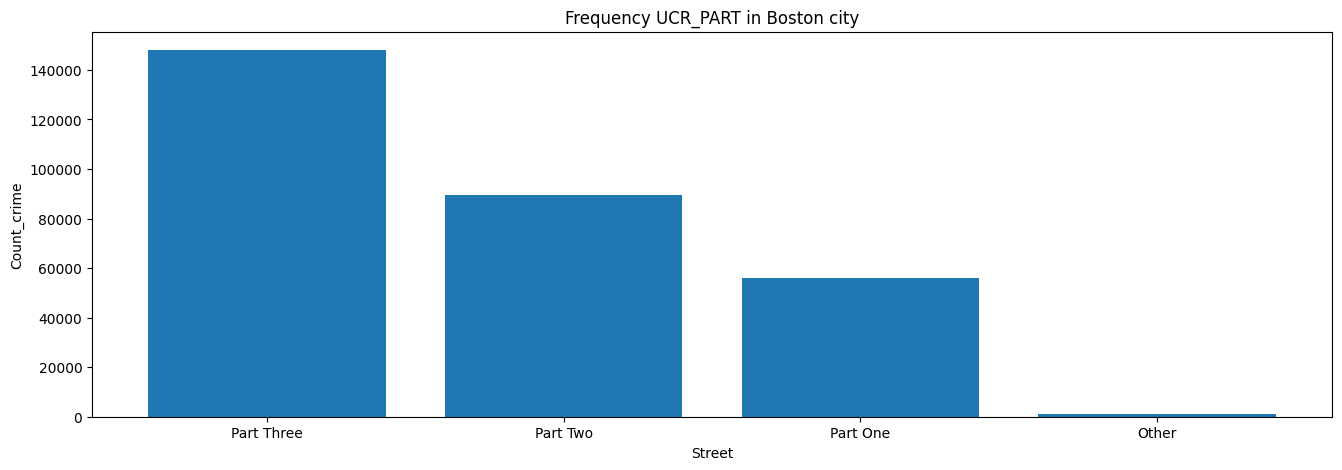

In [14]:
ucr_count = df2['UCR_PART'].value_counts().reset_index()
ucr_count.columns = ['UCR_PART', 'Count']
plt.figure(figsize=(16,5), dpi=100)
plt.bar(ucr_count['UCR_PART'], ucr_count['Count'])
plt.xlabel('Street')
plt.ylabel('Count_crime')
plt.title('Frequency UCR_PART in Boston city')

Top 10 cities with the highest occurrence of UCR in each PART

In [15]:
ucr1 = df2[df2['UCR_PART'] == "Part One"]
street_ucr1_count = ucr1["STREET"].value_counts()

ucr2 = df2[df2['UCR_PART'] == "Part Two"]
street_ucr2_count = ucr2["STREET"].value_counts()

ucr3 = df2[df2['UCR_PART'] == "Part Three"]
street_ucr3_count = ucr3["STREET"].value_counts()

df_ucr1 = street_ucr1_count.head(10).reset_index()
df_ucr2 = street_ucr2_count.head(10).reset_index()
df_ucr3 = street_ucr3_count.head(10).reset_index()

df_ucr1.columns = ['STREET_UCR1', 'COUNT_UCR1']
df_ucr2.columns = ['STREET_UCR2', 'COUNT_UCR2']
df_ucr3.columns = ['STREET_UCR3', 'COUNT_UCR3']

df_compare = pd.concat([df_ucr1, df_ucr2, df_ucr3], axis=1)

df_compare


STREET_UCR1  COUNT_UCR1        STREET_UCR2  COUNT_UCR2  \
0      WASHINGTON ST        2895      WASHINGTON ST        4576   
1        BOYLSTON ST        2506      BLUE HILL AVE        2501   
2      BLUE HILL AVE        1262        BOYLSTON ST        1917   
3         TREMONT ST        1017       HARRISON AVE        1733   
4     HUNTINGTON AVE        1004     DORCHESTER AVE        1569   
5  MASSACHUSETTS AVE         991         TREMONT ST        1491   
6         NEWBURY ST         968  MASSACHUSETTS AVE        1423   
7     DORCHESTER AVE         894          CENTRE ST        1287   
8   COMMONWEALTH AVE         835        COLUMBIA RD         956   
9       HARRISON AVE         763      HYDE PARK AVE         926   

         STREET_UCR3  COUNT_UCR3  
0      WASHINGTON ST        5534  
1      BLUE HILL AVE        3385  
2     DORCHESTER AVE        2225  
3        BOYLSTON ST        2176  
4          CENTRE ST        2086  
5   COMMONWEALTH AVE        2069  
6         TREMONT ST        1951  
7      HYDE PARK AVE        1906  
8  MASSACHUSETTS AVE        1884  
9       HARRISON AVE        1774

In [16]:
# Plot Heat Map for OFFENSE_CODE_GROUP
from folium.plugins import HeatMap
df_crime_geo = df2[['Lat', 'Long']].dropna()
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
HeatMap(data=df_crime_geo[['Lat', 'Long']].values, radius=10).add_to(boston_map)
boston_map

In [17]:
crime_type = "Larceny"
df_crime = df2[df2['OFFENSE_CODE_GROUP'] == crime_type]
df_crime_geo = df_crime[['Lat', 'Long']].dropna()
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
HeatMap(data=df_crime_geo[['Lat', 'Long']].values, radius=10).add_to(boston_map)
boston_map

*********

Which day and time have the highest crime occurrence?

In [18]:
#นับจำนวนครั้งที่เกิดอาชญากรรมในชั่วโมงต่าง ๆ
HOUR_counts = df2['HOUR'].value_counts().reset_index()
HOUR_counts.columns = ['HOUR', 'COUNT']
HOUR_counts['HOUR'] = HOUR_counts['HOUR'].astype(int)
HOUR_counts.sort_values("HOUR")

HOUR  COUNT
11     0  13799
17     1   8498
19     2   7018
21     3   4191
22     4   3147
23     5   3016
20     6   4665
18     7   8213
14     8  12085
12     9  13650
9     10  15142
8     11  15183
3     12  17212
6     13  15574
5     14  15918
7     15  15299
2     16  18414
0     17  19181
1     18  18756
4     19  16297
10    20  14562
13    21  13037
15    22  11897
16    23   9710

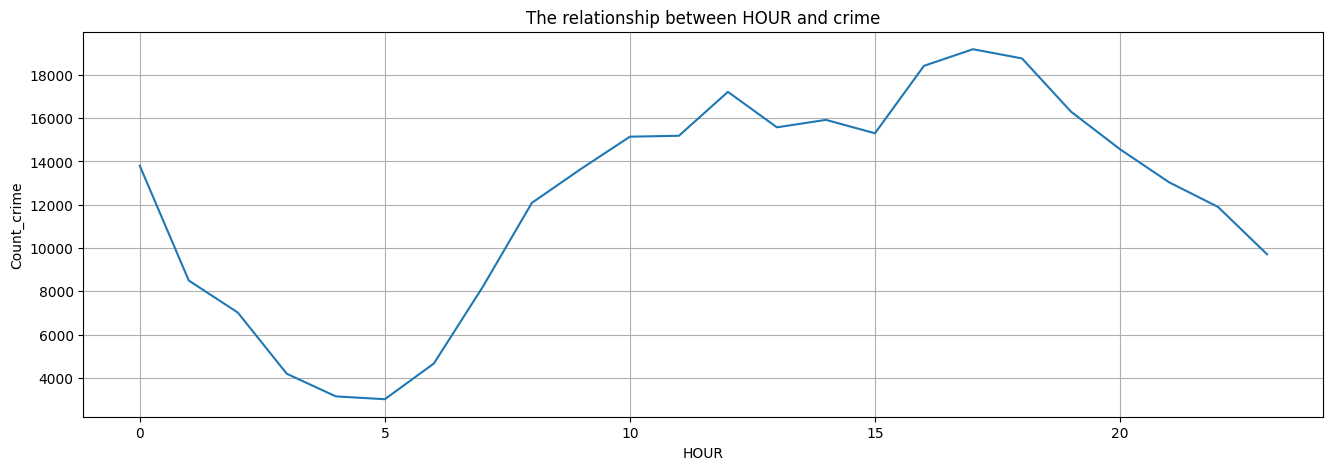

In [19]:
plt.figure(figsize=(16,5), dpi=100)
sns.lineplot(data=HOUR_counts, x="HOUR", y="COUNT")
plt.xlabel('HOUR')
plt.ylabel('Count_crime')
plt.title('The relationship between HOUR and crime')
plt.grid()
plt.show()

rom the visualization of the relationship between time and crime rate, it can be observed that the crime rate noticeably increases after noon.

In [20]:
day_counts_df = df2["DAY_OF_WEEK"].value_counts().reset_index()
day_counts_df.columns = ['DAY_OF_WEEK', 'COUNT']
day_counts_df

DAY_OF_WEEK  COUNT
0      Friday  44774
1    Thursday  43146
2   Wednesday  43143
3     Tuesday  42741
4      Monday  41896
5    Saturday  41406
6      Sunday  37358

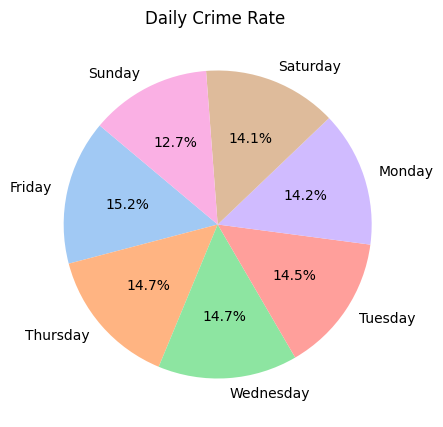

In [21]:
plt.figure(figsize=(16,5))
plt.pie(day_counts_df['COUNT'],
    labels=day_counts_df["DAY_OF_WEEK"],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title("Daily Crime Rate ")
plt.show()

เวลาและวันในวันที่เกิดเหตุใดเกิดเหตุอาชฐากรรมบ่อยที่สุด ?

/tmp/ipython-input-22-3124934870.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = day_freq.pivot_table(index='DAY_OF_WEEK', columns='HOUR', values='Count', fill_value=0)


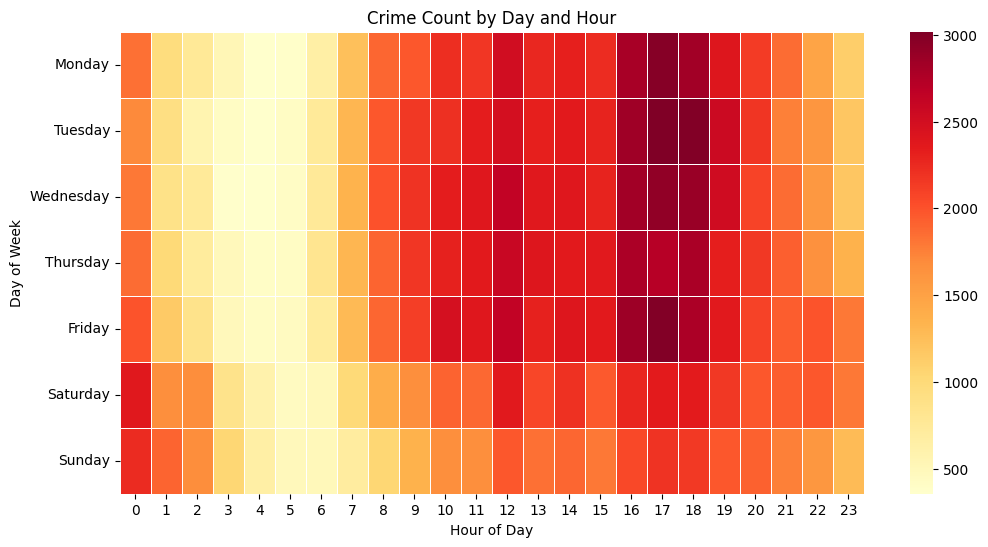

In [22]:
day_freq = df2[['DAY_OF_WEEK', 'HOUR']].value_counts().reset_index()
day_freq.columns = ['DAY_OF_WEEK', 'HOUR', 'Count']
day_freq['HOUR'] = day_freq['HOUR'].astype(int)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_freq['DAY_OF_WEEK'] = pd.Categorical(day_freq['DAY_OF_WEEK'], categories=day_order, ordered=True)

pivot_table = day_freq.pivot_table(index='DAY_OF_WEEK', columns='HOUR', values='Count', fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlOrRd", linewidths=0.5)
plt.title("Crime Count by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


From the scatter plot and heatmap, it is noticeable that crime rates start to increase from 10 AM onwards.


What factors are related to the occurrence of crime in the city of Boston?


In [23]:
crim_corr = df.corr()["crim"]
crim_corr.sort_values(ascending=False)

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219433
dis       -0.379670
b         -0.385064
medv      -0.388305
Name: crim, dtype: float64

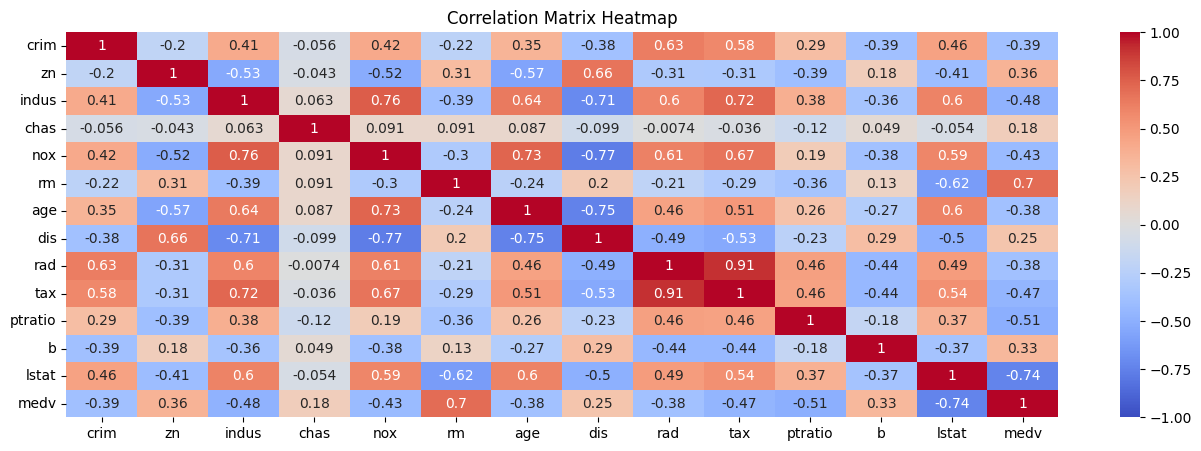

In [24]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(16, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Areas with high crime rates (crim) tend to be near main roads (rad), in industrial zones with high pollution, poor communities, old buildings, low house prices, far from good residential zones, and distant from natural areas. Areas with low crime rates (crim) usually have large houses, high house prices, stable communities, and are far from industrial zones.


แสดงความสัมพันธ์ระหว่างระยาทางที่ใกล้กับถนนสายหลัก กับ อัตราการก่ออาชญากรรม

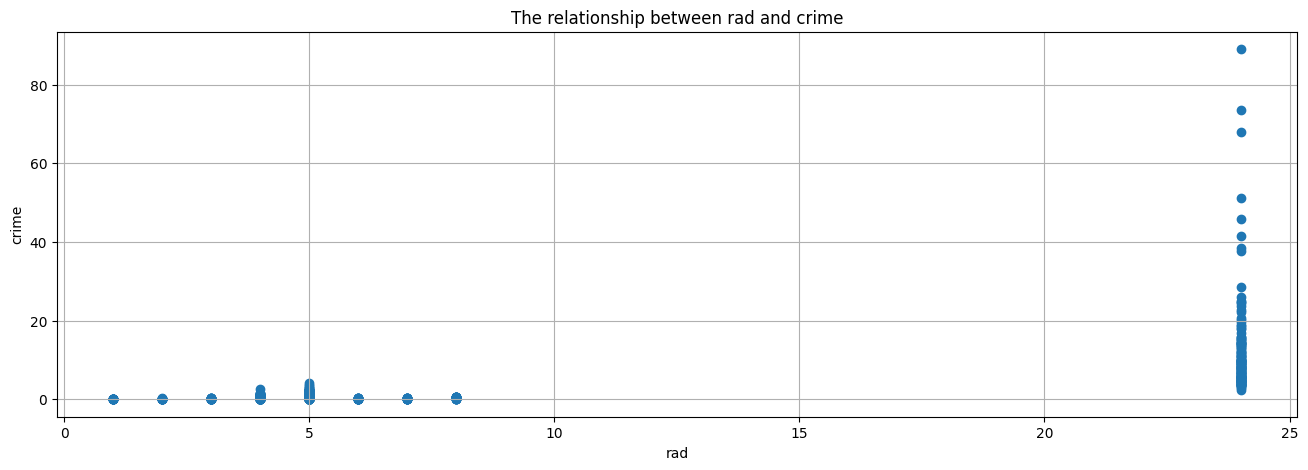

In [25]:
plt.figure(figsize=(16,5), dpi=100)
plt.scatter(df['rad'], df['crim'])
plt.title('The relationship between rad and crime')
plt.xlabel('rad')
plt.ylabel('crime')
plt.grid()
plt.show()

Many cities with greater distances between the city center and main roads tend to have higher crime rates.


Show the relationship between the tax rate and the crime rate.


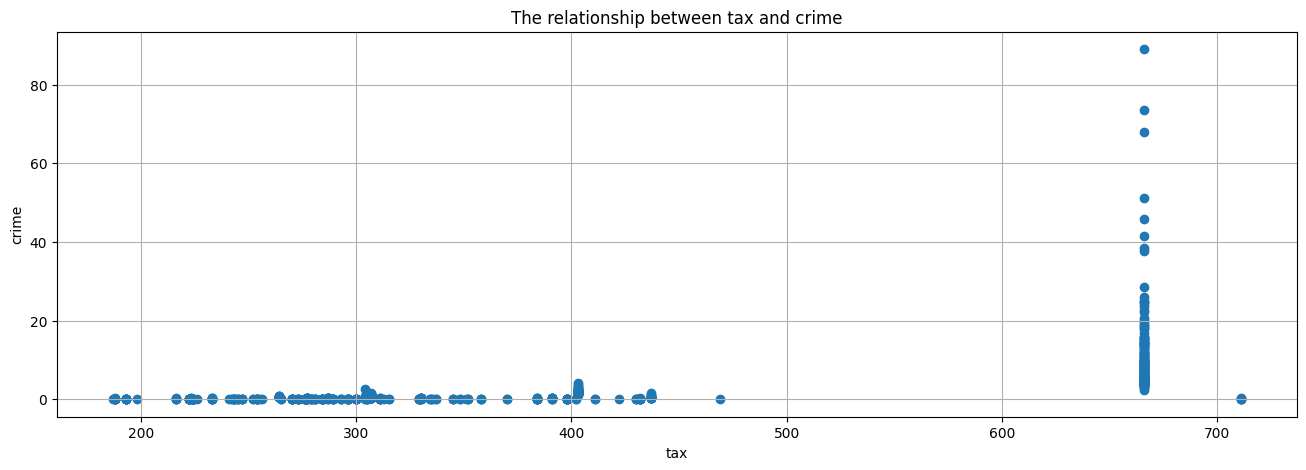

In [26]:
plt.figure(figsize=(16,5), dpi=100)
plt.scatter(df['tax'], df['crim'])
plt.title('The relationship between tax and crime')
plt.xlabel('tax')
plt.ylabel('crime')
plt.grid()
plt.show()

Many cities with high tax rates also tend to have higher crime rates.


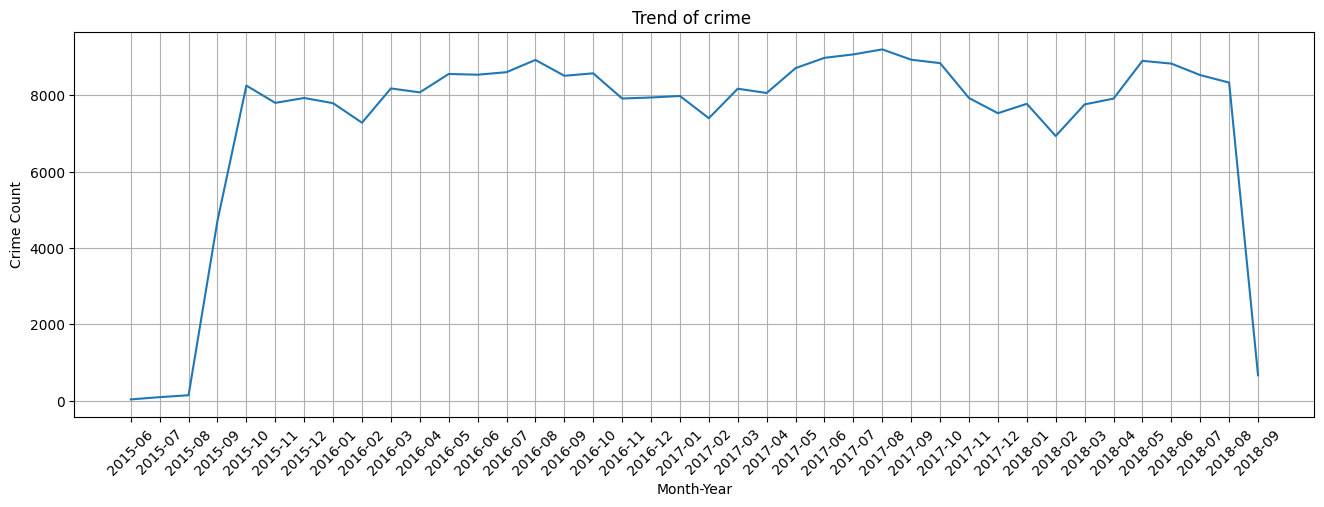

In [27]:
dy = pd.to_datetime(df2['OCCURRED_ON_DATE']).reset_index()

dy_counts = (dy['OCCURRED_ON_DATE'].dt.to_period('M').value_counts().reset_index())

dy_counts.columns = ['month_year', 'Count']

dy_counts = dy_counts.sort_values('month_year')
dy_counts['month_year'] = dy_counts['month_year'].astype(str)

plt.figure(figsize=(16,5), dpi=100)
sns.lineplot(data=dy_counts, x='month_year', y='Count')
plt.xlabel('Month-Year')
plt.ylabel('Crime Count')
plt.title('Trend of crime ')
plt.xticks(rotation=45)
plt.grid()
plt.show()

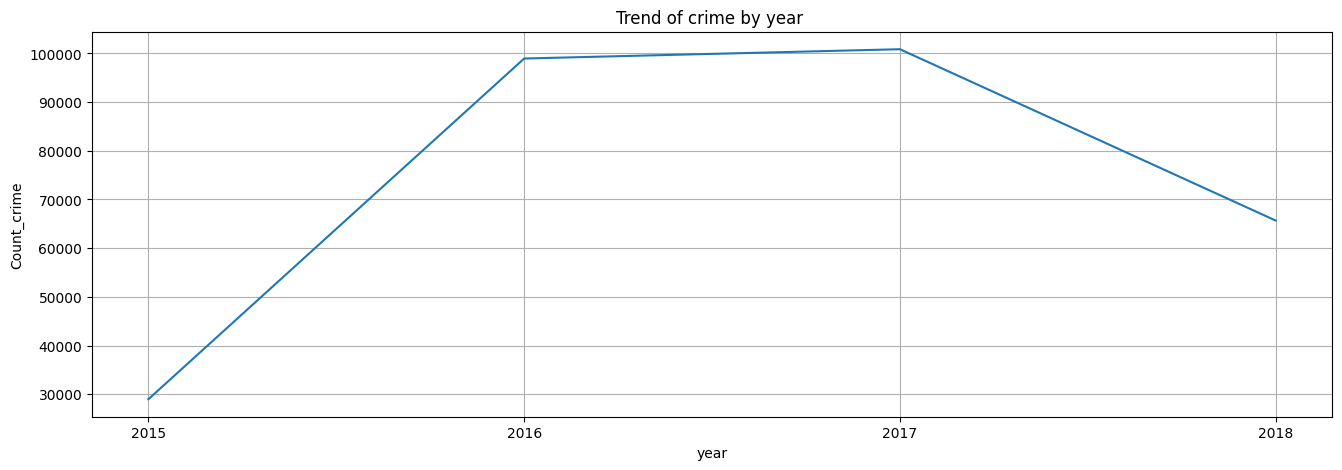

In [28]:
y_counts = dy['OCCURRED_ON_DATE'].dt.to_period('Y').value_counts().reset_index()
y_counts.columns = ['year', 'Count']
y_counts['month_year'] = y_counts['year'].astype(str)
y_counts = y_counts.sort_values('year',ascending=True)
plt.figure(figsize=(16,5), dpi=100)
sns.lineplot(data = y_counts, x = "month_year", y = "Count")
plt.xlabel('year')
plt.ylabel('Count_crime')
plt.title('Trend of crime by year ')
plt.grid()
plt.show()